# Analyzing violent crime

Many of the poorest neighborhoods in the City of Chicago face violent crimes. Since some studies have linked alcohol to different crimes, there is pressure on the city officials to close down liquor establishments. The local business owners, on the other hand, want to block such restrictions as it could negatively impact business and the social fabric of the City. In this sample, we will perform an illustrative analysis to find a find a possible relation between violent crimes and liquor establishments.  This will also help us figure out if poverty and unemployment rate are factors which contribute to more crimes in a specific area of the city.   We will be using the Crime Analysis data from ArcGIS Living Atlas of the World in order to perform this analysis. The data was orginally obtained from the 2014 Violent Crime Data in the City of Chicago data portal (https://data.cityofchicago.org). 

Through this sample, we will demonstrate the utility of a number of spatial analysis methods including hot spot analysis, feature overlay, data enrichment and spatial selection using ArGIS API for Python.

Further, based on the results of the analysis, this sample will try to assist with an effective solution to this problem.


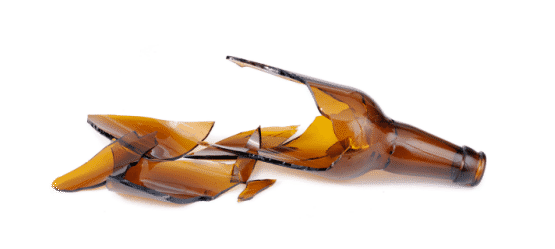

<h1>Table of Contents<span class="tocSkip"></span></h1>

<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Outline-of-Steps" data-toc-modified-id="Steps-1">Outline of Steps</a></span></li>
        <li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-2">Necessary Imports</a></span></li>
        <li><span><a href="#Connect-to-your-GIS" data-toc-modified-id="Connect-to-your-GIS-3">Connect to your GIS</a></span></li>
        <li><span><a href="#Get-the-data-for-the-analysis" data-toc-modified-id="Get-the-data-for-the-analysis-4">Get the data for the analysis</a></span></li>
        <li><span><a href="#Create-a-hot-spot-map-of-violent-crime-densities" data-toc-modified-id="Create-hot-spot-map-of-violent-crime-densities-5">Create a hot spot map of violent crime densities</a></span></li>
        <li><span><a href="#Create-a-hot-spot-map-of-liquor-vendors-to-compare-to-the-violent-crime-hot-spot-map" data-toc-modified-id="Create-a-hot-spot-map-of-liquor-vendors-to-compare-to-the-violent-crime-hot-spot-map-6">Create a hot spot map of liquor vendors to compare to the violent crime hot spot map</a></span></li>
        <li><span><a href="#Get-poverty-data-for-each-of-the-polygon-grids-in-the-violent-crime-hot-spot-analysis-layer" data-toc-modified-id="Get-poverty-data-for-each-of-the-polygon-grids-in-the-violent-crime-hot-spot-analysis-layer-7">Get poverty data for each of the polygon grids in the violent crime hot spot analysis layer</a></span></li>
        <li><span><a href="#Create-a-hot-spot-map-of-poverty" data-toc-modified-id="Create-a-hot-spot-map-of-poverty-8">Create a hot spot map of poverty</a></span></li>
        <li><span><a href="#Overlay-the-violent-crime-and-liquor-vendor-to-find-where-they-overlap." data-toc-modified-id="Overlay-the-violent-crime-and-liquor-vendor-to-find-where-they-overlap.-9">Overlay the violent crime and liquor vendor to find where they overlap.</a></span></li>
        <li><span><a href="#Overlay-the-violent-crime,-liquor-vendor-and-poverty-hot-spot-maps-to-find-where-they-overlap" data-toc-modified-id="Overlay-the-violent-crime,-liquor-vendor-and-poverty-hot-spot-maps-to-find-where-they-overlap-10">Overlay-the-violent-crime,-liquor-vendor-and-poverty-hot-spot-maps-to-find-where-they-overlap</a></span></li>
        <li><span><a href="#Get-the-unemployment-rate-data-matching-the-violent-crime-trends-layer" data-toc-modified-id="Get-the-unemployment-rate-data-matching-the-violent-crime-trends-layer-11">Get the unemployment rate data matching the violent crime trends layer</a></span></li>
        <li><span><a href="#Create-a-hot-spot-map-of-the-unemployment-rate-data" data-toc-modified-id="Create-a-hot-spot-map-of-the-unemployment-rate-data-12">Create a hot spot map of the unemployment rate data</a></span></li>
        <li><span><a href="#Overlay-the-crime-trends-map-with-the-unemployment-hot-spot-map" data-toc-modified-id="Overlay-the-crime-trends-map-with-the-unemployment-hot-spot-map-13">Overlay the crime trends map with the unemployment hot spot map</a></span></li>
        <li><span><a href="#Select-the-high-schools-falling-within-a-quarter-mile-of-the-proposed-remediation-areas" data-toc-modified-id="Select-the-high-schools-falling-within-a-quarter-mile-of-the-proposed-remediation-areas-14">Select the high schools falling within a quarter mile of the proposed remediation areas</a></span></li>
        <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-15">Conclusion</a></span></li>
        <li><span><a href="#Summary-of-tools" data-toc-modified-id="Summary-of-tools-16">Summary of tools</a></span></li> 
        <li><span><a href="#Terms-of-use" data-toc-modified-id="Terms-of-use-17">Terms of use</a></span></li>
    </ul>
</div>

### Outline of Steps

We will use the following workflow for the analysis:

 1. Retrieve Crime Analysis data.
 2. Plot the data on map for visualzation
 3. Perform spatial analysis:
    * We will first create hotspots for the crime densities and liquor vendor layers. This will help is in visualizing the significant areas of crime incidences and liquor vendors.
    * Enrich the crime layer with poverty and unemployment rate data using the enrich_layer tool.
    * Visualize hotspots on the enriched layers.
    * Use overlay tool to find relationship between crimes and liquor establishments. This will also help to know whether or not poverty and unemployment rate are factors contributing to more crimes in any specific area of the city.
 4. Suggest ways for reducing crime based on the results of our analysis
    

### Necessary Imports

In [1]:
from datetime import datetime
from IPython.display import display

from arcgis import GIS
from arcgis.features.analyze_patterns import find_hot_spots
from arcgis.features.enrich_data import enrich_layer
from arcgis.features.manage_data import overlay_layers
from arcgis.features.find_locations import find_existing_locations 

### Connect to your GIS

In [2]:
gis = GIS(url='https://arcgis.com/', username='arcgis_python', password='P@ssword123')

### Get the data for the analysis

Search for **CrimeAnalysisData** layer in ArcGIS Online. We can search for content shared by users outside our organization by setting **outside_org** to True.

In [3]:
items = gis.content.search('title:CrimeAnalysisData owner:api_data_owner', 'feature layer')

<Item title:"CrimeAnalysisData" type:Feature Layer Collection owner:api_data_owner>
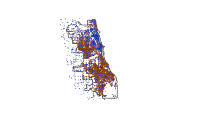

In [4]:
for item in items:
    display(item)

We will use the first item for our analysis. Since the item is a Feature Layer Collection, accessing the layers property will give us a list of FeatureLayer objects.

In [5]:
crime_item = items[0]

In [6]:
lyrs = crime_item.layers

The code below cycles through the layers and prints their names.

In [7]:
for lyr in lyrs:
    print(lyr.properties.name)

Public High Schools
Liquor Vendors
Violent Crime 2014
Analysis Boundary


We'll get the second layer and assign it to the `violent_crimes` variable. Similarly, get the `analysis_boundary` layer.

In [8]:
violent_crimes = lyrs[2] # Violent Crime 2014

In [9]:
analysis_boundary = lyrs[3] # Analysis Boundary

Let's visualize the crime incidents on a map of Chicago.

In [10]:
crime_map = gis.map('Chicago')
crime_map

In [11]:
crime_map.add_layer(violent_crimes)

It is difficult to discern spatial patterns with so many points on the map. To make sense of the more than 22,000 crime points, and over 1,500 business points, we will map them using hot spot analysis. 

We can add a number of different layer objects such as FeatureLayer, FeatureCollection, ImageryLayer, MapImageLayer to the map by calling the add_layer() method.

### Create a hot spot map of violent crime densities

ArcGIS has a set of tools to help us identify, quantify and visualize satial patterns in our data by identifying areas of statistically significant clusters. 

The  `find_hot_spots` tool allows us to visualize areas having such clusters.

In [12]:
crime_hot_spots = find_hot_spots(violent_crimes,
                                 output_name='ViolentCrimeHotSpots' + str(datetime.now().microsecond),
                                 bounding_polygon_layer=analysis_boundary)

In [13]:
crime_hot_spots

<Item title:"ViolentCrimeHotSpots901831" type:Feature Layer Collection owner:arcgis_python>

In [14]:
crime_spots_map = gis.map('Chicago')
crime_spots_map

This map shows us the statistically significant hot spots (red) and cold spots (blue) for violent crime.

In [15]:
crime_spots_map.add_layer(crime_hot_spots)

Next, we will use the `liquor_vendors` layer.

In [16]:
liquor_vendors = lyrs[1]

### Create a hot spot map of liquor vendors to compare to the violent crime hot spot map

In [17]:
liquor_vendor_hot_spots = find_hot_spots(liquor_vendors,
                                         output_name='LiquorVendorHotSpots' + str(datetime.now().microsecond),
                                         aggregation_polygon_layer=crime_hot_spots)

In [18]:
liquor_vendor_hot_spots

<Item title:"LiquorVendorHotSpots326258" type:Feature Layer Collection owner:arcgis_python>

In [19]:
liquor_vendor_hot_spots_lyr = liquor_vendor_hot_spots.layers[0]

In [20]:
liquor_hot_spots_map =  gis.map('Chicago')
liquor_hot_spots_map

This map shows us the statistically significant hot spots (red) and cold spots (blue) for liquor establishments..

In [21]:
liquor_hot_spots_map.add_layer(liquor_vendor_hot_spots_lyr)

In order to identify the city's most vulnerable neighborhoods, we will obtain the data needed to create a hot spot map of poverty.

### Get poverty data for each of the polygon grids in the violent crime hot spot analysis layer

The `enrich_layer` tool gives us demographic and landascape data for the people, places, and businesses in a specific area, or within a selected travel time or distance from a location. 

We will add analysis variables, i.e, poverty, to our layer. This will enrich our layer with the poverty data. 

In [22]:
poverty_enrich= enrich_layer(crime_hot_spots, 
                             analysis_variables=["households.ACSHHBPOV"], 
                             output_name='PovertyDataEnrichedLayer' + str(datetime.now().microsecond))

In [23]:
poverty_enrich

<Item title:"PovertyDataEnrichedLayer757157" type:Feature Layer Collection owner:arcgis_python>

In [24]:
poverty_enrich_lyr = poverty_enrich.layers[0]

### Create a hot spot map of poverty

We can find hot spots of the enriched_layer by assigning the field name of the analysis variable to parameter 'analysis_field'.

In [25]:
poverty_data_hot_spots = find_hot_spots(poverty_enrich_lyr,
                                        analysis_field='ACSHHBPOV',
                                        output_name='povertyEnrichedHotSpots' + str(datetime.now().microsecond))

Load the map again to visualize the poverty_data_hot_spots

In [26]:
poverty_data_hot_spots_map = gis.map('Chicago')
poverty_data_hot_spots_map

In [27]:
poverty_data_hot_spots_map.add_layer(poverty_data_hot_spots)

The red areas are statistically significant hot spots for poverty.

We will now filter the three variables, i.e., violent crime, existing liquor establishments, and poverty in order to get statistically significant hot spots.

### Overlay the violent crime and liquor vendor to find where they overlap.

We will assign the Gi_Bin attribute a value of 3 in order to get statistically significant hot spots at 99 percent confidence level.

In [28]:
crimelayer = crime_hot_spots.layers[0]
crimelayer.filter = "Gi_Bin = 3"

In [29]:
liquorlayer = liquor_vendor_hot_spots.layers[0]
liquorlayer.filter = "Gi_Bin = 3"

In [30]:
povertylayer = poverty_data_hot_spots.layers[0]
povertylayer.filter = "Gi_Bin = 3"

The `overlay_layers` function combines two or more layers into one single layer using an intersect, union, or erase method. We can think of overlay as peering through a stack of maps and creating a single map containing all the information found in the stack.
We will use the crimelayer as the input layer and intersect it with the liquorlayer. 

In [31]:
intersect_of_crime_vendor = overlay_layers(crimelayer,
                                           liquorlayer,
                                           tolerance=0,
                                           context={},
                                           output_name="IntersectOfCrimeVendor" + str(datetime.now().microsecond))

In [32]:
intersect_of_crime_vendor

<Item title:"IntersectOfCrimeVendor284772" type:Feature Layer Collection owner:arcgis_python>

### Overlay the violent crime, liquor vendor and poverty hot spot maps to find where they overlap

In [33]:
intersect_cri_pov_liq = overlay_layers(intersect_of_crime_vendor,
                                       poverty_data_hot_spots,
                                       output_name="intersectOfCrimeVendorPoverty" + str(datetime.now().microsecond))

In [34]:
intersect_cri_pov_liq

<Item title:"intersectOfCrimeVendorPoverty626067" type:Feature Layer Collection owner:arcgis_python>

Next, we will load the overlay layer on the map.

In [35]:
intersected_map = gis.map('Chicago')
intersected_map

In [36]:
intersected_map.add_layer(intersect_cri_pov_liq)

With the exception of the small overlapping areas identified above, we find no spatial correlation between violent crime and businesses that sell or serve alcohol.

However since violent crimes are serious problem in the city, we will look into the current research in this area in order to provide a possible solution to this problem.

A recent research indicates that two years ago the City implemented a summer jobs program that proved tremendously effective in reducing violent crime. So we will obtain unemployment data and repeat our hot spot analysis to see if we find a stronger spatial correlation between unemployment and violent crime than we did between liquor establishments and violent crime. 

### Get the unemployment rate data matching the violent crime trends layer


The space-time pattern mining tools are not currently available in ArcGIS API for Python which are required to create crime trend map. Although we can create the crime trend map using <a href='http://desktop.arcgis.com/en/analytics/case-studies/broken-bottles-2-arcmap-workflow.htm#ESRI_STEPS_4EF9CB8AB43145B99E9E343CB9C10917'>ArcMap</a> or using <a href='http://desktop.arcgis.com/en/analytics/case-studies/broken-bottles-3-pro-workflow.htm#ESRI_STEPS_5B9E855169CA4B818AF51D0FF69CE66A'>ArcGIS Pro </a>. 
For our analysis we will use the layer already published in ArcGIS Online. To access the layer, search for **ViolentCrimeTrend** in ArcGIS Online. We can search the GIS for feature layer collections by specifying the item type as 'Feature Layer Collection' or 'Feature Layer'.

In [37]:
crime_trend = gis.content.search('title:ViolentCrimeTrend owner: api_data_owner', 'feature layer')
crime_trend_item = crime_trend[0]

crime_trend_layer = crime_trend_item.layers[0]


We will use the `enrich_layer` tool to add more demographic information to the layer.

In [38]:
crime_trend_unemp_enrich = enrich_layer(crime_trend_layer, 
                                        analysis_variables=["industry.UNEMPRT_CY"], 
                                        output_name='UnemploymentEnrichedLayer' + str(datetime.now().microsecond))

### Create a hot spot map of the unemployment rate data

We use find_hot_spots tool to spot hot spots of **crime_trend_enriched_unemployment** layer.

In [39]:
unemployment_rate_hot_spots = find_hot_spots(crime_trend_unemp_enrich,
                                             analysis_field='UNEMPRT_CY',
                                             output_name='UnemploymentRateHotspots' + str(datetime.now().microsecond))

Now let's load and visualize the hot spots on the map.

In [40]:
unemployment_rate_hot_spots_map = gis.map('Chicago')
unemployment_rate_hot_spots_map

In [41]:
unemployment_rate_hot_spots_map.add_layer(unemployment_rate_hot_spots)

### Overlay the crime trends map with the unemployment hot spot map


We will filter unemployment_rate_hot_spots to select locations where the Gi_Bin Fixed 4554_FDR field is 3 (3 is the code for statistically significant hot spots at the 99 percent confidence level, as we mentioned earlier). Then we will filter the most intense unemployment hot spots

In [42]:
unemployment_rate_hot_spots.layers[0].filter = "Gi_Bin = 3"

For the crime trends map, we are interested in specific Pattern Type values: Intensifying, Consecutive, and Persistent hot spots. 

In [43]:
crime_trend_layer.filter = "(PATTERN = 'Consecutive Hot Spot') OR (PATTERN ='Intensifying Hot Spot') OR (PATTERN = 'Persistent Hot Spot')"

We use `overlay_layers` tool to find areas that are common to crime trend layer and unemployment_rate_hot_spots.

In [44]:
overlay_unemp_crime = overlay_layers(crime_trend_layer,
                                     unemployment_rate_hot_spots,
                                     output_name="OverlayUnEmploymentCrimetrend" + str(datetime.now().microsecond))

In [45]:
overlay_unemp_crime

<Item title:"OverlayUnEmploymentCrimetrend" type:Feature Layer Collection owner:demos_deldev>

Now let's load and visualize on map.

In [46]:
overlay_map = gis.map('Chicago')
overlay_map

In [47]:
overlay_map.add_layer(overlay_unemp_crime)

We indeed find that there are a number of locations where the violent crime and unemployment hot spots overlap.

The blue areas are the locations where intensifying, persistent, and consecutive hot spot trends overlap with the most intense unemployment hot spots.

High schools within a quarter mile of the remediation areas where high violent crime and high unemployment overlap should be targeted for an expanded summer jobs program.So we will identify such schools.

### Select the high schools falling within a quarter mile of the proposed remediation areas

In [48]:
public_high_school_layer = lyrs[0]

In [49]:
selected_schools = find_existing_locations(input_layers=[{'url': public_high_school_layer.url},
                                                         {'url': crime_trend_unemp_enrich.layers[0].url}],
                                           expressions=[{"operator":"",
                                                         "layer":0,
                                                         "selectingLayer":1,
                                                         "spatialRel":"withinDistance",
                                                         "distance":0.25,
                                                         "units":"Miles"}],
                                           output_name='SelectedSchools' + str(datetime.now().microsecond))

In [50]:
selected_schools

<Item title:"SelectedSchools350273" type:Feature Layer Collection owner:arcgis_python>

In [51]:
selected_high_schools_map = gis.map('Chicago')
selected_high_schools_map

In [52]:
selected_high_schools_map.add_layer(selected_schools)

## Conclusion

In this study, we performed hotspot analysis on violent crimes layer and liquor vendors layer. We enriched the crime hotspots layer with poverty indicators and produced a poverty hotspot layer. When all 3 layers were overlaid, we found no spatial correlation. In the next step, we enriched the crime layer with unemployment information and produced an unemployment hotspot layer. However, this layer was spatially correlated with the crimes layer when overlaid. As a solution, we used find_existing_locations tools to identify high schools within 0.25 miles of places with high crime and high unemployment as candidates for summer programs as an abatement measure.


## Summary of tools

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s268{text-align:left}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s268">Method</th>
    <th class="tg-s268">Examples</th>
  </tr>
  <tr>
    <td class="tg-0lax">Hot Spot Analysis of feature attributes</td>
    <td class="tg-0lax">Where are the statistically significant clusters of poverty, unemployment, wealth, beer drinkers, lead levels, or college graduates?</td>
  </tr>
  <tr>
    <td class="tg-0lax">Feature Overlay</td>
    <td class="tg-0lax">Where are the intersections among high crime areas, high liquor vendor areas, and high poverty areas? Where are high lead levels and poor educational outcomes spatially congruent?</td>
  </tr>
  <tr>
    <td class="tg-0lax">Spatial Selection</td>
    <td class="tg-0lax">Which schools are close to the remediation areas? Which homes fall within the flood zone? Which ZIP Codes are within the county?</td>
  </tr>
  <tr>
    <td class="tg-0lax">Data Enrich</td>
    <td class="tg-0lax">Which aeas have high poverty and unemployment rate?</td>
  </tr>
</table>

## Terms of use

In keeping with the requirements of the City of Chicago Data Portal terms of data use, note the following: This case study describes analyses using data that have been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago. The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site. The data provided at this site is subject to change at any time. It is understood that the data provided at this site is being used at one's own risk.